In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']

In [4]:
raw_dataset=pd.read_csv('auto-mpg.data',na_values='?',comment='\t',sep=' ',skipinitialspace=True,names=columns)

In [5]:
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
raw_dataset.shape

(398, 8)

In [7]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
raw_dataset['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [10]:
raw_dataset['horsepower'].median()

93.5

In [11]:
np.round(raw_dataset['horsepower'].median())

94.0

In [12]:
raw_dataset.replace(np.nan,np.round(raw_dataset['horsepower'].median()), inplace=True)

In [14]:
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [16]:
raw_dataset.origin.unique()

array([1, 3, 2], dtype=int64)

In [19]:
origin_=pd.get_dummies(raw_dataset['origin'])
origin_.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# pd.concat is used for merging two different dataframes but of same length
# axis=1 : column wise operation

mpg_df=pd.concat([raw_dataset,origin_],axis=1)

In [21]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0


In [22]:
mpg_df.drop(['origin'],axis=1,inplace=True)

In [23]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [24]:
mpg_df.rename({1:'USA', 2:'Europe', 3:'Japan'},axis=1,inplace=True)

* Correlation

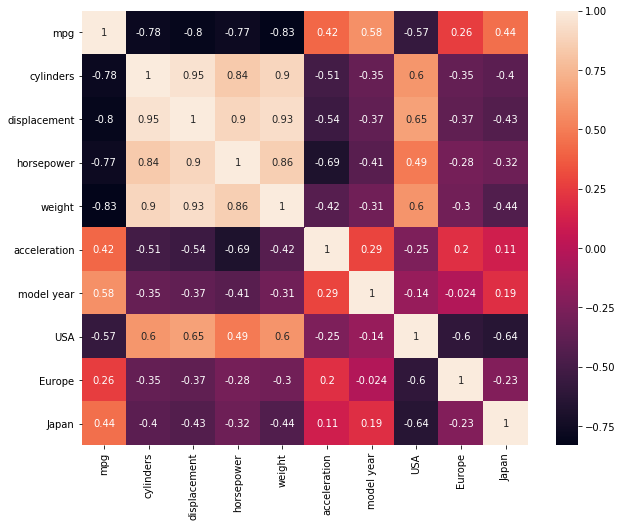

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(mpg_df.corr(),annot=True)

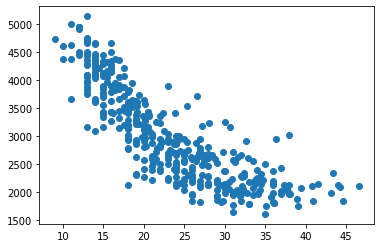

In [29]:
plt.scatter(x=mpg_df['mpg'], y=mpg_df['weight'])
plt.show()

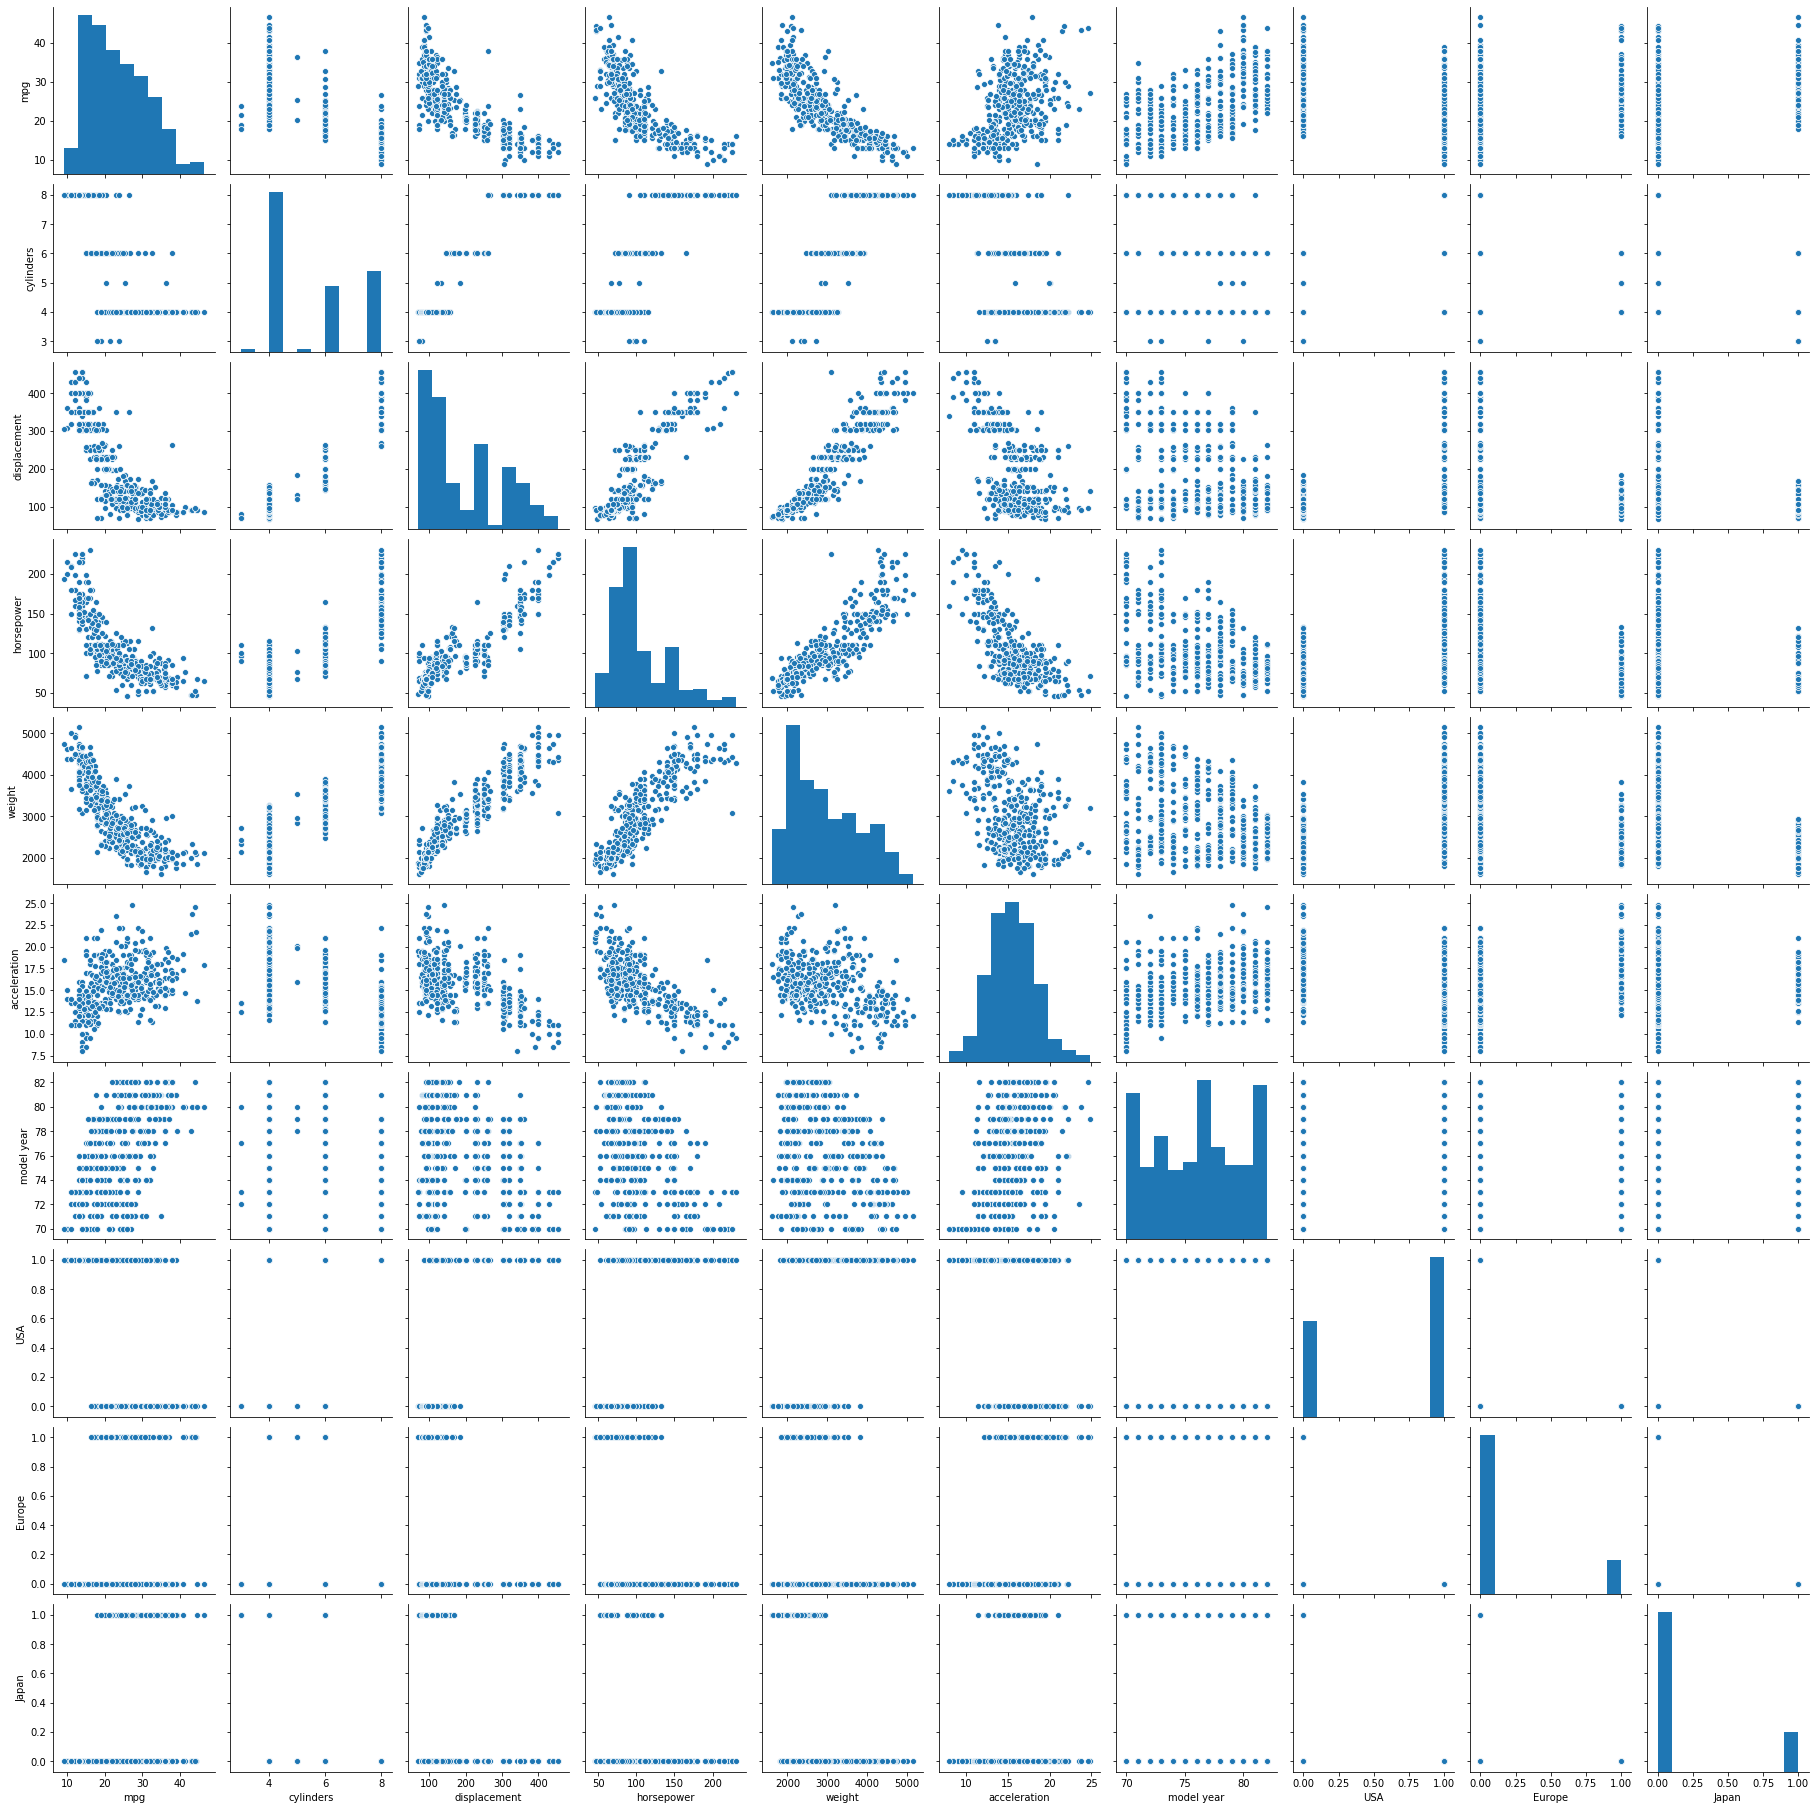

In [30]:
sns.pairplot(mpg_df,kind='scatter',hue='cylinders')

In [31]:
X=mpg_df.drop('mpg',axis=1)

In [33]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [34]:
Y=mpg_df['mpg']

In [36]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [39]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler_X=scaler.fit_transform(X)

In [41]:
scaler_X

array([[1.        , 0.61757106, 0.45652174, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.64673913, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.64599483, 0.56521739, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.13178295, 0.19565217, ..., 1.        , 0.        ,
        0.        ]])

In [74]:
# Train and Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaler_X,Y,test_size=0.2, random_state=1)

* ANN Algorithm

In [75]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [76]:
def build_model ():
  model = Sequential([
                      # Input Layer
                      Dense(units = 128, activation= 'relu', input_shape = [len(X.keys())]),
                      ## Hidden layers
                      Dense(units= 256, activation='relu'),
                      # Output Layer
                      Dense(units = 1)])
  # Alpha = Learning Rate (0.0001 - 0.5)
  optimizers = RMSprop(learning_rate=0.0001)

  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                'mean_absolute_error'])
  
  return model
  

In [77]:
model = build_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train, Y_train, epochs=500, batch_size = 20, validation_split=0.15) 

Train on 270 samples, validate on 48 samples
Epoch 1/500
270/270 [==============================] - 0s 470us/step - loss: 618.9608 - mean_squared_error: 618.9608 - mean_absolute_error: 23.5513 - val_loss: 552.7530 - val_mean_squared_error: 552.7530 - val_mean_absolute_error: 22.4213
Epoch 2/500
270/270 [==============================] - 0s 67us/step - loss: 607.2537 - mean_squared_error: 607.2538 - mean_absolute_error: 23.2914 - val_loss: 542.6950 - val_mean_squared_error: 542.6951 - val_mean_absolute_error: 22.1861
Epoch 3/500
270/270 [==============================] - 0s 70us/step - loss: 597.0184 - mean_squared_error: 597.0184 - mean_absolute_error: 23.0594 - val_loss: 532.8256 - val_mean_squared_error: 532.8256 - val_mean_absolute_error: 21.9522
Epoch 4/500
270/270 [==============================] - 0s 74us/step - loss: 586.6409 - mean_squared_error: 586.6409 - mean_absolute_error: 22.8213 - val_loss: 522.5405 - val_mean_squared_error: 522.5405 - val_mean_absolute_error: 21.7049
Ep

270/270 [==============================] - 0s 74us/step - loss: 127.3581 - mean_squared_error: 127.3581 - mean_absolute_error: 9.4006 - val_loss: 95.6749 - val_mean_squared_error: 95.6749 - val_mean_absolute_error: 8.4679
Epoch 36/500
270/270 [==============================] - 0s 70us/step - loss: 120.3598 - mean_squared_error: 120.3598 - mean_absolute_error: 9.1575 - val_loss: 90.2923 - val_mean_squared_error: 90.2923 - val_mean_absolute_error: 8.2674
Epoch 37/500
270/270 [==============================] - 0s 74us/step - loss: 113.9460 - mean_squared_error: 113.9460 - mean_absolute_error: 8.9488 - val_loss: 85.4921 - val_mean_squared_error: 85.4921 - val_mean_absolute_error: 8.0850
Epoch 38/500
270/270 [==============================] - 0s 89us/step - loss: 107.9263 - mean_squared_error: 107.9263 - mean_absolute_error: 8.7206 - val_loss: 80.9543 - val_mean_squared_error: 80.9543 - val_mean_absolute_error: 7.9004
Epoch 39/500
270/270 [==============================] - 0s 70us/step - lo

270/270 [==============================] - 0s 67us/step - loss: 26.2353 - mean_squared_error: 26.2353 - mean_absolute_error: 3.9557 - val_loss: 23.9202 - val_mean_squared_error: 23.9202 - val_mean_absolute_error: 3.7076
Epoch 71/500
270/270 [==============================] - 0s 70us/step - loss: 25.6459 - mean_squared_error: 25.6459 - mean_absolute_error: 3.9093 - val_loss: 23.6544 - val_mean_squared_error: 23.6544 - val_mean_absolute_error: 3.6715
Epoch 72/500
270/270 [==============================] - 0s 71us/step - loss: 25.0263 - mean_squared_error: 25.0263 - mean_absolute_error: 3.8539 - val_loss: 23.3917 - val_mean_squared_error: 23.3917 - val_mean_absolute_error: 3.6370
Epoch 73/500
270/270 [==============================] - 0s 70us/step - loss: 24.5151 - mean_squared_error: 24.5151 - mean_absolute_error: 3.8099 - val_loss: 23.1418 - val_mean_squared_error: 23.1418 - val_mean_absolute_error: 3.6114
Epoch 74/500
270/270 [==============================] - 0s 71us/step - loss: 23.9

270/270 [==============================] - 0s 70us/step - loss: 15.9462 - mean_squared_error: 15.9462 - mean_absolute_error: 3.1011 - val_loss: 18.5481 - val_mean_squared_error: 18.5481 - val_mean_absolute_error: 3.4545
Epoch 106/500
270/270 [==============================] - 0s 74us/step - loss: 15.8081 - mean_squared_error: 15.8081 - mean_absolute_error: 3.0879 - val_loss: 18.3850 - val_mean_squared_error: 18.3850 - val_mean_absolute_error: 3.4563
Epoch 107/500
270/270 [==============================] - 0s 74us/step - loss: 15.6921 - mean_squared_error: 15.6921 - mean_absolute_error: 3.0782 - val_loss: 18.5839 - val_mean_squared_error: 18.5839 - val_mean_absolute_error: 3.4499
Epoch 108/500
270/270 [==============================] - 0s 70us/step - loss: 15.5636 - mean_squared_error: 15.5636 - mean_absolute_error: 3.0640 - val_loss: 18.3891 - val_mean_squared_error: 18.3891 - val_mean_absolute_error: 3.4408
Epoch 109/500
270/270 [==============================] - 0s 67us/step - loss: 

270/270 [==============================] - 0s 70us/step - loss: 12.7108 - mean_squared_error: 12.7108 - mean_absolute_error: 2.7508 - val_loss: 15.7473 - val_mean_squared_error: 15.7473 - val_mean_absolute_error: 3.1347
Epoch 141/500
270/270 [==============================] - 0s 70us/step - loss: 12.6311 - mean_squared_error: 12.6311 - mean_absolute_error: 2.7325 - val_loss: 15.6613 - val_mean_squared_error: 15.6613 - val_mean_absolute_error: 3.1195
Epoch 142/500
270/270 [==============================] - 0s 70us/step - loss: 12.5523 - mean_squared_error: 12.5523 - mean_absolute_error: 2.7295 - val_loss: 15.9026 - val_mean_squared_error: 15.9026 - val_mean_absolute_error: 3.1319
Epoch 143/500
270/270 [==============================] - 0s 70us/step - loss: 12.5082 - mean_squared_error: 12.5082 - mean_absolute_error: 2.7338 - val_loss: 15.4429 - val_mean_squared_error: 15.4429 - val_mean_absolute_error: 3.0943
Epoch 144/500
270/270 [==============================] - 0s 70us/step - loss: 

270/270 [==============================] - 0s 70us/step - loss: 10.5345 - mean_squared_error: 10.5345 - mean_absolute_error: 2.4749 - val_loss: 13.6132 - val_mean_squared_error: 13.6132 - val_mean_absolute_error: 2.7847
Epoch 176/500
270/270 [==============================] - 0s 70us/step - loss: 10.5021 - mean_squared_error: 10.5021 - mean_absolute_error: 2.4708 - val_loss: 13.6931 - val_mean_squared_error: 13.6931 - val_mean_absolute_error: 2.7867
Epoch 177/500
270/270 [==============================] - 0s 74us/step - loss: 10.4467 - mean_squared_error: 10.4467 - mean_absolute_error: 2.4645 - val_loss: 13.4230 - val_mean_squared_error: 13.4230 - val_mean_absolute_error: 2.7601
Epoch 178/500
270/270 [==============================] - 0s 67us/step - loss: 10.4292 - mean_squared_error: 10.4292 - mean_absolute_error: 2.4692 - val_loss: 13.3943 - val_mean_squared_error: 13.3943 - val_mean_absolute_error: 2.7519
Epoch 179/500
270/270 [==============================] - 0s 74us/step - loss: 

270/270 [==============================] - 0s 74us/step - loss: 9.1953 - mean_squared_error: 9.1953 - mean_absolute_error: 2.2796 - val_loss: 12.1442 - val_mean_squared_error: 12.1442 - val_mean_absolute_error: 2.5205
Epoch 211/500
270/270 [==============================] - 0s 63us/step - loss: 9.1596 - mean_squared_error: 9.1596 - mean_absolute_error: 2.2713 - val_loss: 12.1151 - val_mean_squared_error: 12.1151 - val_mean_absolute_error: 2.5175
Epoch 212/500
270/270 [==============================] - 0s 67us/step - loss: 9.1023 - mean_squared_error: 9.1023 - mean_absolute_error: 2.2665 - val_loss: 12.1017 - val_mean_squared_error: 12.1017 - val_mean_absolute_error: 2.5169
Epoch 213/500
270/270 [==============================] - 0s 59us/step - loss: 9.1015 - mean_squared_error: 9.1015 - mean_absolute_error: 2.2601 - val_loss: 12.2421 - val_mean_squared_error: 12.2421 - val_mean_absolute_error: 2.5399
Epoch 214/500
270/270 [==============================] - 0s 59us/step - loss: 9.0716 -

270/270 [==============================] - 0s 59us/step - loss: 8.3319 - mean_squared_error: 8.3319 - mean_absolute_error: 2.1443 - val_loss: 11.3028 - val_mean_squared_error: 11.3028 - val_mean_absolute_error: 2.3763
Epoch 246/500
270/270 [==============================] - 0s 59us/step - loss: 8.3750 - mean_squared_error: 8.3750 - mean_absolute_error: 2.1451 - val_loss: 11.2522 - val_mean_squared_error: 11.2522 - val_mean_absolute_error: 2.3660
Epoch 247/500
270/270 [==============================] - 0s 59us/step - loss: 8.3194 - mean_squared_error: 8.3194 - mean_absolute_error: 2.1382 - val_loss: 11.4070 - val_mean_squared_error: 11.4070 - val_mean_absolute_error: 2.4079
Epoch 248/500
270/270 [==============================] - 0s 63us/step - loss: 8.3540 - mean_squared_error: 8.3540 - mean_absolute_error: 2.1469 - val_loss: 11.3214 - val_mean_squared_error: 11.3214 - val_mean_absolute_error: 2.3847
Epoch 249/500
270/270 [==============================] - 0s 67us/step - loss: 8.2838 -

270/270 [==============================] - 0s 59us/step - loss: 7.8823 - mean_squared_error: 7.8823 - mean_absolute_error: 2.0777 - val_loss: 10.8621 - val_mean_squared_error: 10.8621 - val_mean_absolute_error: 2.3167
Epoch 281/500
270/270 [==============================] - 0s 63us/step - loss: 7.9466 - mean_squared_error: 7.9466 - mean_absolute_error: 2.0860 - val_loss: 10.8677 - val_mean_squared_error: 10.8677 - val_mean_absolute_error: 2.3186
Epoch 282/500
270/270 [==============================] - 0s 63us/step - loss: 7.9210 - mean_squared_error: 7.9210 - mean_absolute_error: 2.0695 - val_loss: 10.9154 - val_mean_squared_error: 10.9154 - val_mean_absolute_error: 2.3302
Epoch 283/500
270/270 [==============================] - 0s 59us/step - loss: 7.8913 - mean_squared_error: 7.8913 - mean_absolute_error: 2.0738 - val_loss: 10.8789 - val_mean_squared_error: 10.8789 - val_mean_absolute_error: 2.3223
Epoch 284/500
270/270 [==============================] - 0s 59us/step - loss: 7.9119 -

270/270 [==============================] - 0s 56us/step - loss: 7.6279 - mean_squared_error: 7.6279 - mean_absolute_error: 2.0313 - val_loss: 10.5431 - val_mean_squared_error: 10.5431 - val_mean_absolute_error: 2.2615
Epoch 316/500
270/270 [==============================] - 0s 59us/step - loss: 7.6183 - mean_squared_error: 7.6183 - mean_absolute_error: 2.0188 - val_loss: 10.6143 - val_mean_squared_error: 10.6143 - val_mean_absolute_error: 2.2806
Epoch 317/500
270/270 [==============================] - 0s 59us/step - loss: 7.6035 - mean_squared_error: 7.6035 - mean_absolute_error: 2.0224 - val_loss: 10.5369 - val_mean_squared_error: 10.5369 - val_mean_absolute_error: 2.2620
Epoch 318/500
270/270 [==============================] - 0s 63us/step - loss: 7.5791 - mean_squared_error: 7.5791 - mean_absolute_error: 2.0199 - val_loss: 10.5370 - val_mean_squared_error: 10.5370 - val_mean_absolute_error: 2.2619
Epoch 319/500
270/270 [==============================] - 0s 63us/step - loss: 7.6116 -

270/270 [==============================] - 0s 59us/step - loss: 7.3967 - mean_squared_error: 7.3967 - mean_absolute_error: 1.9921 - val_loss: 10.4456 - val_mean_squared_error: 10.4456 - val_mean_absolute_error: 2.2528
Epoch 351/500
270/270 [==============================] - 0s 59us/step - loss: 7.4144 - mean_squared_error: 7.4144 - mean_absolute_error: 1.9961 - val_loss: 10.5044 - val_mean_squared_error: 10.5044 - val_mean_absolute_error: 2.2663
Epoch 352/500
270/270 [==============================] - 0s 59us/step - loss: 7.3885 - mean_squared_error: 7.3885 - mean_absolute_error: 1.9959 - val_loss: 10.3674 - val_mean_squared_error: 10.3674 - val_mean_absolute_error: 2.2434
Epoch 353/500
270/270 [==============================] - 0s 59us/step - loss: 7.3925 - mean_squared_error: 7.3925 - mean_absolute_error: 1.9856 - val_loss: 10.4895 - val_mean_squared_error: 10.4895 - val_mean_absolute_error: 2.2622
Epoch 354/500
270/270 [==============================] - 0s 59us/step - loss: 7.4000 -

270/270 [==============================] - 0s 63us/step - loss: 7.2766 - mean_squared_error: 7.2766 - mean_absolute_error: 1.9755 - val_loss: 10.2339 - val_mean_squared_error: 10.2339 - val_mean_absolute_error: 2.2227
Epoch 386/500
270/270 [==============================] - 0s 67us/step - loss: 7.2761 - mean_squared_error: 7.2761 - mean_absolute_error: 1.9719 - val_loss: 10.2311 - val_mean_squared_error: 10.2311 - val_mean_absolute_error: 2.2198
Epoch 387/500
270/270 [==============================] - 0s 67us/step - loss: 7.2638 - mean_squared_error: 7.2638 - mean_absolute_error: 1.9772 - val_loss: 10.1882 - val_mean_squared_error: 10.1882 - val_mean_absolute_error: 2.2200
Epoch 388/500
270/270 [==============================] - 0s 63us/step - loss: 7.2792 - mean_squared_error: 7.2792 - mean_absolute_error: 1.9681 - val_loss: 10.3068 - val_mean_squared_error: 10.3068 - val_mean_absolute_error: 2.2378
Epoch 389/500
270/270 [==============================] - 0s 67us/step - loss: 7.2725 -

270/270 [==============================] - 0s 67us/step - loss: 7.1555 - mean_squared_error: 7.1555 - mean_absolute_error: 1.9551 - val_loss: 10.2655 - val_mean_squared_error: 10.2655 - val_mean_absolute_error: 2.2367
Epoch 421/500
270/270 [==============================] - 0s 67us/step - loss: 7.1741 - mean_squared_error: 7.1741 - mean_absolute_error: 1.9640 - val_loss: 10.1560 - val_mean_squared_error: 10.1560 - val_mean_absolute_error: 2.2123
Epoch 422/500
270/270 [==============================] - 0s 63us/step - loss: 7.1676 - mean_squared_error: 7.1676 - mean_absolute_error: 1.9617 - val_loss: 10.1684 - val_mean_squared_error: 10.1684 - val_mean_absolute_error: 2.2149
Epoch 423/500
270/270 [==============================] - 0s 59us/step - loss: 7.1653 - mean_squared_error: 7.1653 - mean_absolute_error: 1.9541 - val_loss: 10.1693 - val_mean_squared_error: 10.1693 - val_mean_absolute_error: 2.2169
Epoch 424/500
270/270 [==============================] - 0s 63us/step - loss: 7.1592 -

270/270 [==============================] - 0s 70us/step - loss: 7.0790 - mean_squared_error: 7.0790 - mean_absolute_error: 1.9483 - val_loss: 10.0478 - val_mean_squared_error: 10.0478 - val_mean_absolute_error: 2.2006
Epoch 456/500
270/270 [==============================] - 0s 70us/step - loss: 7.1015 - mean_squared_error: 7.1015 - mean_absolute_error: 1.9490 - val_loss: 10.0762 - val_mean_squared_error: 10.0762 - val_mean_absolute_error: 2.2023
Epoch 457/500
270/270 [==============================] - 0s 67us/step - loss: 7.0585 - mean_squared_error: 7.0585 - mean_absolute_error: 1.9457 - val_loss: 10.1983 - val_mean_squared_error: 10.1983 - val_mean_absolute_error: 2.2229
Epoch 458/500
270/270 [==============================] - 0s 67us/step - loss: 7.0551 - mean_squared_error: 7.0551 - mean_absolute_error: 1.9452 - val_loss: 10.0495 - val_mean_squared_error: 10.0495 - val_mean_absolute_error: 2.2068
Epoch 459/500
270/270 [==============================] - 0s 67us/step - loss: 7.0998 -

270/270 [==============================] - 0s 67us/step - loss: 7.0309 - mean_squared_error: 7.0309 - mean_absolute_error: 1.9387 - val_loss: 9.9982 - val_mean_squared_error: 9.9982 - val_mean_absolute_error: 2.1995
Epoch 491/500
270/270 [==============================] - 0s 59us/step - loss: 7.0079 - mean_squared_error: 7.0079 - mean_absolute_error: 1.9354 - val_loss: 10.0491 - val_mean_squared_error: 10.0491 - val_mean_absolute_error: 2.2004
Epoch 492/500
270/270 [==============================] - 0s 67us/step - loss: 7.0080 - mean_squared_error: 7.0080 - mean_absolute_error: 1.9440 - val_loss: 10.0143 - val_mean_squared_error: 10.0143 - val_mean_absolute_error: 2.1998
Epoch 493/500
270/270 [==============================] - 0s 67us/step - loss: 6.9771 - mean_squared_error: 6.9771 - mean_absolute_error: 1.9415 - val_loss: 10.0551 - val_mean_squared_error: 10.0551 - val_mean_absolute_error: 2.2014
Epoch 494/500
270/270 [==============================] - 0s 63us/step - loss: 7.0338 - m

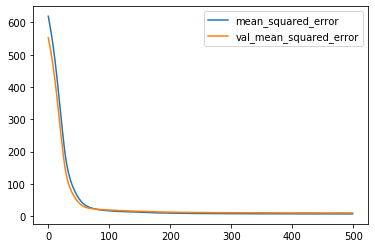

In [79]:
pd.DataFrame(history.history).head()
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()

In [80]:
from sklearn.metrics import r2_score
predictions=model.predict(X_test)
r2_score(Y_test,predictions)

0.8953231879653757